In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fee function

In [2]:
def f(x, a, b, c):
    return a*x**2 + b*x + c

In [3]:
fees = [120, 480, 1080, 1920, 3000, 4320, 5880, 7680, 9720, 12000]

In [4]:
popt, pcov = curve_fit(f, np.arange(1, 11), fees)

In [5]:
popt

array([ 1.19999997e+02,  2.86894588e-05, -6.22881119e-05])

In [6]:
a, b, c = 120, 0, 0

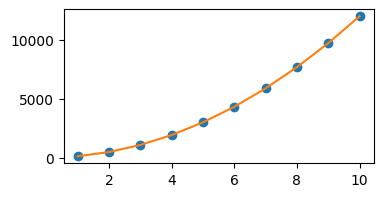

In [7]:
plt.figure(figsize=(4, 2))
plt.scatter(np.arange(1, 11), fees)
plt.plot(np.arange(1, 11), [a * x ** 2 for x in np.arange(1, 11)], c='tab:orange')
plt.show()

# Optimal position size function

In [8]:
def calc_fee(pos_pct):
    return 120 * pos_pct ** 2

In [9]:
def calc_pnl(pos_pct, pos_change_pct, capital=1_000_000):
    fee = calc_fee(pos_pct)
    return pos_pct / 100 * capital * pos_change_pct / 100 - fee

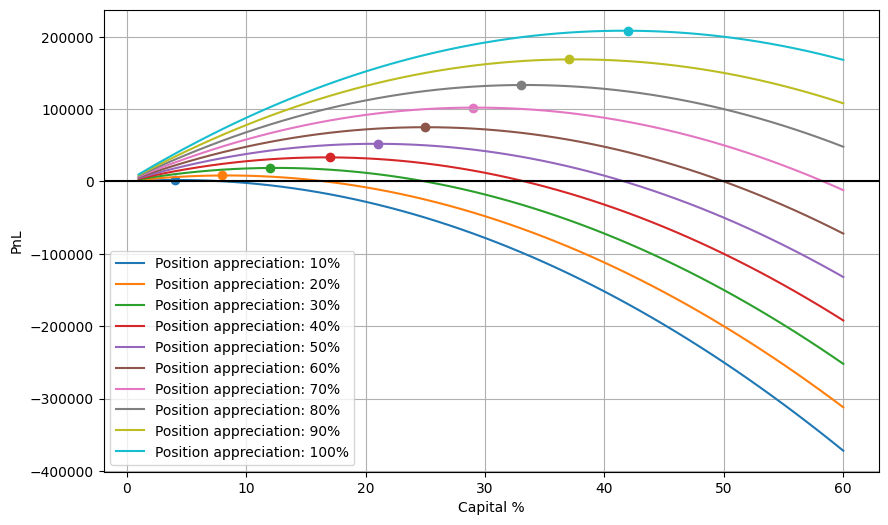

In [14]:
plt.figure(figsize=(10, 6))
for pct in np.arange(10, 101, 10):
    pnls = [calc_pnl(pos_pct=x, pos_change_pct=pct) for x in np.arange(1, 61)]
    plt.plot(np.arange(1, 61), pnls, label=f'Position appreciation: {pct}%')
    plt.scatter(np.argmax(pnls) + 1, pnls[np.argmax(pnls)])
plt.axhline(0, c='k')
plt.grid('on')
plt.xlabel('Capital %')
plt.ylabel('PnL')
plt.legend()
plt.show()

In [11]:
def opt_pos_pct(pos_change_pct):
    pnls = []
    for i in range(1, 101):
        pnls.append(calc_pnl(pos_pct=i, pos_change_pct=pos_change_pct))
    return np.argmax(pnls) + 1

In [12]:
for i in range(10, 121, 10):
    print(f'Position appreciation: {i}% --> Optimal capital percentage: {opt_pos_pct(i)}%')

Position appreciation: 10% --> Optimal capital percentage: 4%
Position appreciation: 20% --> Optimal capital percentage: 8%
Position appreciation: 30% --> Optimal capital percentage: 12%
Position appreciation: 40% --> Optimal capital percentage: 17%
Position appreciation: 50% --> Optimal capital percentage: 21%
Position appreciation: 60% --> Optimal capital percentage: 25%
Position appreciation: 70% --> Optimal capital percentage: 29%
Position appreciation: 80% --> Optimal capital percentage: 33%
Position appreciation: 90% --> Optimal capital percentage: 37%
Position appreciation: 100% --> Optimal capital percentage: 42%
Position appreciation: 110% --> Optimal capital percentage: 46%
Position appreciation: 120% --> Optimal capital percentage: 50%


# Portfolio

True return for each product from last year:\
Refrigerators: 2\
Earrings: 12\
Blankets: -33\
Sleds: -28\
Sculptures: 20\
PS6: 31\
Serum: -82\
Lamps: 0\
Chocolate: 0

In [33]:
price_changes = {
    'Cacti Needle': -33,
    'Quantum Coffee': -82,
    'Ranch sauce': 12,
    'Solar panels': -28,
    'Moonshine': 0,
    'Haystacks': 2,
    'Red Flags': 20,
    'Striped shirts': 0,
    'VR Monocle': 31
}

In [34]:
positions = {}
for k, v in price_changes.items():
    positions[k] = np.sign(v) * opt_pos_pct(np.abs(v))

In [35]:
positions

{'Cacti Needle': np.int64(-14),
 'Quantum Coffee': np.int64(-34),
 'Ranch sauce': np.int64(5),
 'Solar panels': np.int64(-12),
 'Moonshine': np.int64(0),
 'Haystacks': np.int64(1),
 'Red Flags': np.int64(8),
 'Striped shirts': np.int64(0),
 'VR Monocle': np.int64(13)}

In [36]:
print(f'% Capital used: {np.sum(np.abs(list(positions.values())))}')

% Capital used: 87


In [37]:
pnls = {}
for k, v in positions.items():
    pnls[k] = calc_pnl(abs(v), abs(price_changes[k]), capital=1_000_000)

In [38]:
pnls

{'Cacti Needle': np.float64(22680.0),
 'Quantum Coffee': np.float64(140080.0),
 'Ranch sauce': np.float64(3000.0),
 'Solar panels': np.float64(16320.0),
 'Moonshine': np.float64(0.0),
 'Haystacks': np.float64(80.0),
 'Red Flags': np.float64(8320.0),
 'Striped shirts': np.float64(0.0),
 'VR Monocle': np.float64(20020.0)}

In [39]:
np.sum(list(pnls.values()))

np.float64(210500.0)